In [2]:
import nashpy as nash
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
import warnings
warnings.filterwarnings("ignore")

# Space prisoners

|         | **Destroy**  | **Befriend** | **Do nothing**  |
|---------|----------|------------|-----------|
| **Destroy** | $-\infty, -\infty$ | $d_1, -\infty$    | $d_1, -\infty$ |
| **Befriend** | $-\infty, d_2$    | $f_1, f_2$       | $0, 0$    |
| **Do nothing** | $-\infty, d_2$ | $0, 0$    | $0, 0$ |


In [68]:
payoffs = np.array([
    [[-999, -999], [-1, -999], [-1, -999]],
    [[-999, -1], [1, 1], [0, 0]],
    [[-999, -1], [0, 0], [0, 0]]
])

C_1 = payoffs[:, :, 0]  # Player 1's payoffs
C_2 = payoffs[:, :, 1]  # Player 2's payoffs

game = nash.Game(C_1, C_2)

In [69]:
# payoffs = np.array([
#     [[-np.inf, -np.inf], [-1, -np.inf], [-1, -np.inf]],
#     [[-np.inf, -1], [1, 1], [0, 0]],
#     [[-np.inf, -1], [0, 0], [0, 0]]
# ])

# C_1 = payoffs[:, :, 0]  # Player 1's payoffs
# C_2 = payoffs[:, :, 1]  # Player 2's payoffs

# game = nash.Game(C_1, C_2)

In [70]:
game

Bi matrix game with payoff matrices:

Row player:
[[-999   -1   -1]
 [-999    1    0]
 [-999    0    0]]

Column player:
[[-999 -999 -999]
 [  -1    1    0]
 [  -1    0    0]]

In [71]:
for eq in game.support_enumeration():
    print(eq)

(array([1., 0., 0.]), array([1., 0., 0.]))
(array([0., 1., 0.]), array([0., 1., 0.]))
(array([0., 0., 1.]), array([0., 0., 1.]))


In [72]:
for eq in game.vertex_enumeration():
    print(np.round(eq))

[[-0.  0.  1.]
 [-0.  0.  1.]]
[[-0.  1. -0.]
 [-0.  1. -0.]]


In [30]:
game.fictitious_play(10)

<generator object fictitious_play at 0x7fb5101856d0>

In [102]:
iterations = 500
play_counts = game.fictitious_play(iterations=iterations)
    

In [103]:
play_counts = np.array(list(play_counts))

In [113]:
play_counts.shape

(501, 2, 3)

In [119]:
c1_choices = play_counts[:, 0, :] 
c2_choices = play_counts[:, 1, :]

c1_choices = c1_choices / c1_choices.sum(axis=1)[:, None]
c2_choices = c2_choices / c2_choices.sum(axis=1)[:, None]

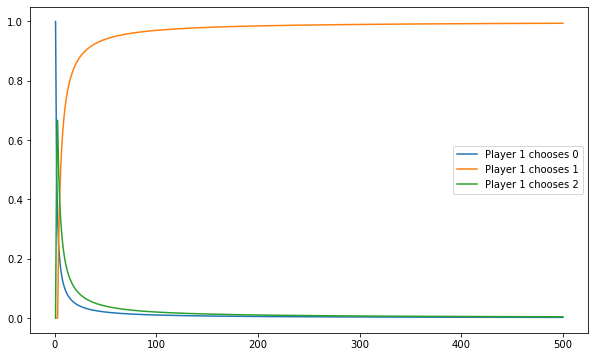

In [123]:
plt.figure(figsize=(10, 6))
for strategy, name in zip(c1_choices, [''])
    plt.plot(c1_choices[:, i], label=f"Player 1 chooses {i}")

plt.legend()
plt.show()

In [120]:
c1_choices

array([[       nan,        nan,        nan],
       [1.        , 0.        , 0.        ],
       [0.5       , 0.        , 0.5       ],
       ...,
       [0.00200803, 0.9939759 , 0.00401606],
       [0.00200401, 0.99398798, 0.00400802],
       [0.002     , 0.994     , 0.004     ]])

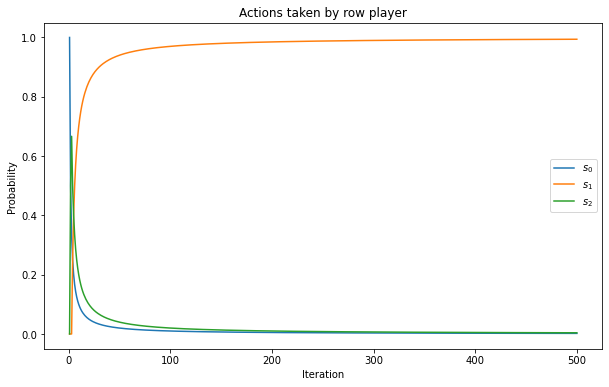

In [104]:
plt.figure(figsize=(10, 6))
probabilities = [row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]
for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number}$")  
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.title("Actions taken by row player")  
plt.legend()  

In [40]:
# Define the payoff matrices for both players
payoffs_player1 = np.array([
    [-1000, -1, -1],
    [-1000, 1, 0],
    [-1000, 0, 0]
])

payoffs_player2 = np.array([
    [-1000, -1000, -1000],
    [-1, 1, 0],
    [-1, 0, 0]
])

# Create the game
game = nash.Game(payoffs_player1, payoffs_player2)

# Verify Nash equilibria
equilibria = list(game.vertex_enumeration())

# Print the equilibria
for eq in equilibria:
    print(f"Player 1 strategy: {np.round(eq[0])}, Player 2 strategy: {np.round(eq[1])}")

Player 1 strategy: [0. 0. 1.], Player 2 strategy: [0. 0. 1.]
Player 1 strategy: [-0.  1. -0.], Player 2 strategy: [-0.  1. -0.]


/Users/dmitryserg/opt/anaconda3/lib/python3.9/site-packages/nashpy/polytope/polytope.py:109: RuntimeWarning: divide by zero encountered in divide
  hs = HalfspaceIntersection(halfspaces, feasible_point)
/Users/dmitryserg/opt/anaconda3/lib/python3.9/site-packages/nashpy/polytope/polytope.py:109: RuntimeWarning: invalid value encountered in divide
  hs = HalfspaceIntersection(halfspaces, feasible_point)


In [44]:
A = np.array([
    [-1000, -1, -1],
    [-1000, 1, 0],
    [-1000, 0, 0]
])

B = np.array([
    [-1000, -1000, -1000],
    [-1, 1, 0],
    [-1, 0, 0]
])

# Define the game
game = nash.Game(A, B)

# Find Nash equilibria
equilibria = list(game.vertex_enumeration())

# Display the equilibria
for eq in equilibria:
    print("Player 1 strategy:", np.round(eq[0]))
    print("Player 2 strategy:", np.round(eq[1]))
    print()

Player 1 strategy: [0. 0. 1.]
Player 2 strategy: [0. 0. 1.]

Player 1 strategy: [-0.  1. -0.]
Player 2 strategy: [-0.  1. -0.]



/Users/dmitryserg/opt/anaconda3/lib/python3.9/site-packages/nashpy/polytope/polytope.py:109: RuntimeWarning: divide by zero encountered in divide
  hs = HalfspaceIntersection(halfspaces, feasible_point)
/Users/dmitryserg/opt/anaconda3/lib/python3.9/site-packages/nashpy/polytope/polytope.py:109: RuntimeWarning: invalid value encountered in divide
  hs = HalfspaceIntersection(halfspaces, feasible_point)


In [65]:
def remove_dominated_strategies(A, B):
    def is_dominated(payoff_matrix, strategy):
        num_strategies = payoff_matrix.shape[0]
        for other_strategy in range(num_strategies):
            if other_strategy != strategy:
                if all(payoff_matrix[strategy, :] <= payoff_matrix[other_strategy, :]):
                    return True
        return False

    def get_non_dominated_strategies(payoff_matrix):
        return [i for i in range(payoff_matrix.shape[0]) if not is_dominated(payoff_matrix, i)]

    non_dominated_A = get_non_dominated_strategies(A)
    non_dominated_B = get_non_dominated_strategies(B.T)

    non_dominated_strategies = list(set(non_dominated_A) & set(non_dominated_B))
    A_reduced = A[non_dominated_strategies][:, non_dominated_strategies]
    B_reduced = B[non_dominated_strategies][:, non_dominated_strategies]

    return A_reduced, B_reduced

# Payoff matrix for Player 1 with -np.inf replaced by -999
payoffs = np.array([
    [[-999, -999], [-1, -999], [-1, -999]],
    [[-999, -1], [1, 1], [0, 0]],
    [[-999, -1], [0, 0], [0, 0]]
])

C_1 = payoffs[:, :, 0]  # Player 1's payoffs
C_2 = payoffs[:, :, 1]  # Player 2's payoffs

game = nash.Game(C_1, C_2)

# Remove dominated strategies
C_1_reduced, C_2_reduced = remove_dominated_strategies(C_1, C_2)

# Define the reduced game
reduced_game = nash.Game(C_1_reduced, C_2_reduced)

In [67]:
reduced_game

Bi matrix game with payoff matrices:

Row player:
[[1]]

Column player:
[[1]]

In [66]:
# Find Nash equilibria using vertex enumeration
equilibria_reduced = list(reduced_game.support_enumeration())

# Display the equilibria
for eq in equilibria_reduced:
    print("Nash Equilibrium:", eq)
    print("Player 1 strategy:", eq[0])
    print("Player 2 strategy:", eq[1])
    print()

Nash Equilibrium: (array([1.]), array([1.]))
Player 1 strategy: [1.]
Player 2 strategy: [1.]



In [110]:
list(game.lemke_howson_enumeration())

[(array([1., 0., 0.]), array([1., 0., 0.])),
 (array([0., 1., 0.]), array([0., 1., 0.])),
 (array([0., 1., 0.]), array([0., 1., 0.])),
 (array([1., 0., 0.]), array([1., 0., 0.])),
 (array([0., 1., 0.]), array([0., 1., 0.])),
 (array([0., 1., 0.]), array([0., 1., 0.]))]